In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('dataset_processed_onehot.csv', delimiter=';')

print(df.ShotType.unique())
print(df.Transition.unique())
print(df.TwoLegged.unique())
print(df.Angle.unique())
print(df.Distance.unique())
#data = df.to_numpy()      
df

[0 1 5 3 4 2]
[1 0]
[1 0]
[73.83 28.13 51.88 ... 89.06 50.17  3.42]
[0.73 1.02 7.22 3.64 7.2  1.07 0.56 0.59 0.91 0.75 0.62 7.51 2.14 7.49
 1.36 7.36 2.42 6.27 0.86 6.95 1.29 1.68 7.15 0.67 7.31 5.92 4.42 5.32
 6.92 7.6  7.03 0.55 7.07 0.64 0.6  1.8  0.65 6.94 2.99 1.48 0.47 7.09
 0.53 5.34 4.36 2.7  7.33 2.74 1.47 0.81 2.27 7.47 0.38 1.06 4.34 0.52
 3.19 1.23 5.57 7.17 0.96 0.8  7.7  1.12 1.6  4.68 1.05 5.74 0.44 0.69
 1.03 7.37 5.55 4.95 1.17 0.98 1.3  0.66 0.71 0.79 1.08 4.54 5.87 1.01
 7.32 1.33 7.21 6.9  7.05 2.78 1.49 5.04 2.57 5.53 3.32 7.29 1.2  7.3
 7.19 3.98 7.08 2.71 5.97 0.45 0.77 0.54 7.14 7.38 3.69 0.61 7.28 7.48
 0.83 5.56 4.64 4.13 0.93 1.24 0.68 2.   4.87 5.47 1.7  5.24 2.52 3.87
 8.47 3.31 1.88 2.13 1.46 5.64 1.95 0.72 7.5  0.74 1.44 7.16 2.73 4.83
 7.   3.41 8.62 7.53 1.4  4.69 4.82 4.74 3.33 3.7  1.61 2.75 3.71 1.1
 1.18 0.76 1.81 4.15 3.96 4.66 2.06 3.6  5.23 5.26 7.55 6.99 5.42 5.49
 0.57 6.58 5.01 6.31 5.15 7.26 4.33 7.12 0.43 9.67 5.99 3.38 1.28 3.59
 4.67 1.79 

,Unnamed: 0,ShotType,Transition,TwoLegged,Angle,Distance,competition_EURO,competition_NBA,competition_SLO1,competition_U14,playertype_F,playertype_G,movement_dribble or cut,movement_no
0,0,0,1,1,73.83,0.73,0,0,0,1,1,0,0,1
1,1,1,0,1,28.13,1.02,0,0,0,1,1,0,0,1
2,2,0,0,1,51.88,7.22,0,0,0,1,1,0,0,1
3,3,0,1,1,80.84,3.64,0,0,0,1,1,0,0,1
4,4,0,0,1,30.89,7.20,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5019,5019,1,0,1,0.00,0.52,1,0,0,0,0,0,0,1
5020,5020,0,0,1,60.91,4.29,1,0,0,0,0,0,0,1
5021,5021,3,0,1,26.86,0.83,1,0,0,0,0,0,0,1
5022,5022,0,0,1,3.42,5.38,1,0,0,0,0,0,0,1


In [2]:
df = pd.read_csv('dataset.csv', delimiter=';')

In [3]:
df

,ShotType,Competition,PlayerType,Transition,TwoLegged,Movement,Angle,Distance
0,above head,U14,F,1,1,no,73.83,0.73
1,layup,U14,F,0,1,no,28.13,1.02
2,above head,U14,F,0,1,no,51.88,7.22
3,above head,U14,F,1,1,no,80.84,3.64
4,above head,U14,F,0,1,no,30.89,7.20
...,...,...,...,...,...,...,...,...
5019,layup,EURO,C,0,1,no,0.00,0.52
5020,above head,EURO,C,0,1,no,60.91,4.29
5021,hook shot,EURO,C,0,1,no,26.86,0.83
5022,above head,EURO,C,0,1,no,3.42,5.38


In [13]:
shottype_mapping={
    'above head':0,
    'layup':1,
    'tip-in':2,
    'hook shot':3,
    'dunk':4,
    'other':5
}
df['ShotType'] = df.ShotType.map(shottype_mapping)

array([nan])

In [14]:
df.ShotType.unique()

array([nan])

In [7]:
df = pd.concat([df,pd.get_dummies(df['Competition'], prefix='competition')],axis=1)
df.drop(['Competition', 'competition_U16'],axis=1, inplace=True)

df = pd.concat([df,pd.get_dummies(df['PlayerType'], prefix='playertype')],axis=1)
df.drop(['PlayerType', 'playertype_C'],axis=1, inplace=True)

df = pd.concat([df,pd.get_dummies(df['Movement'], prefix='movement')],axis=1)
df.drop(['Movement', 'movement_drive'],axis=1, inplace=True)

In [26]:
#print(df.Competition.unique())
#print(df.PlayerType.unique())
print(df.Transition.unique())
print(df.TwoLegged.unique())
#print(df.Movement.unique())
#print(df.Angle.unique())
#print(df.Distance.unique())

[1 0]
[1 0]


In [37]:
df['Angle'] = (df['Angle'] - df['Angle'].mean()) / df['Angle'].std()
df['Distance'] = (df['Distance'] - df['Distance'].mean()) / df['Distance'].std()

In [9]:
df['Distance'].max()

9.95

In [8]:
df

,ShotType,Transition,TwoLegged,Angle,Distance,competition_EURO,competition_NBA,competition_SLO1,competition_U14,playertype_F,playertype_G,movement_dribble or cut,movement_no
0,0,1,1,73.83,0.73,0,0,0,1,1,0,0,1
1,1,0,1,28.13,1.02,0,0,0,1,1,0,0,1
2,0,0,1,51.88,7.22,0,0,0,1,1,0,0,1
3,0,1,1,80.84,3.64,0,0,0,1,1,0,0,1
4,0,0,1,30.89,7.20,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5019,1,0,1,0.00,0.52,1,0,0,0,0,0,0,1
5020,0,0,1,60.91,4.29,1,0,0,0,0,0,0,1
5021,3,0,1,26.86,0.83,1,0,0,0,0,0,0,1
5022,0,0,1,3.42,5.38,1,0,0,0,0,0,0,1


## Old encoding

In [15]:
df.Competition.unique()
competition_mapping={
    'U14':1,
    'U16':2,
    'NBA':3,
    'SLO1':4,
    'EURO':5
}
df['Competition'] = df.Competition.map(competition_mapping)
df.Competition.unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [16]:
df.PlayerType.unique()
playertype_mapping={
    'F':1,
    'G':2,
    'C':3
}
df['PlayerType'] = df.PlayerType.map(playertype_mapping)
df.PlayerType.unique()

array([1, 2, 3], dtype=int64)

In [17]:
df.Movement.unique()
movement_mapping={
    'no':1,
    'dribble or cut':2,
    'drive':3
}
df['Movement'] = df.Movement.map(movement_mapping)
df.Movement.unique()

array([1, 2, 3], dtype=int64)

In [18]:
df.Angle.unique()

array([73.83, 28.13, 51.88, ..., 89.06, 50.17,  3.42])

In [19]:
df.Distance

0       0.73
1       1.02
2       7.22
3       3.64
4       7.20
        ... 
5019    0.52
5020    4.29
5021    0.83
5022    5.38
5023    1.44
Name: Distance, Length: 5024, dtype: float64

In [11]:
df.to_csv('dataset_processed_onehot.csv', sep=';')

In [12]:
df.to_numpy()

array([[0., 1., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [3., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [3., 0., 1., ..., 0., 0., 1.]])

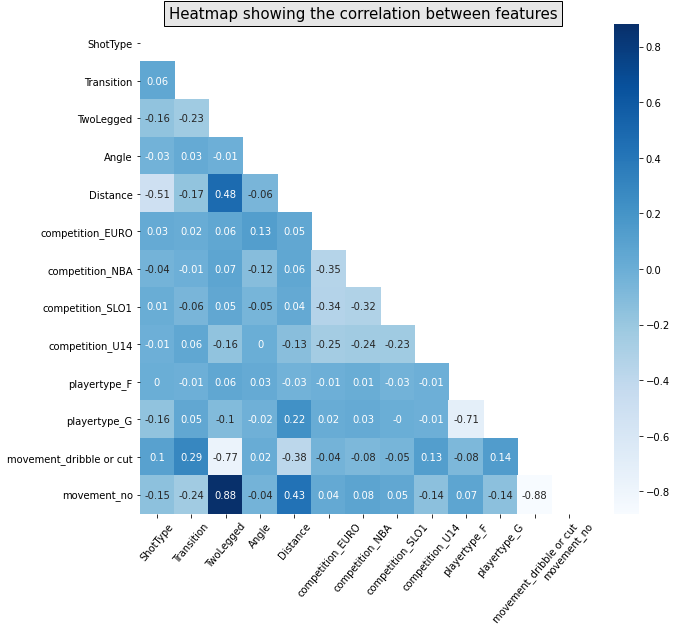

In [35]:
correlation_mtx=df.corr().round(2)
mask=np.zeros_like(correlation_mtx)
triangle_idx = np.triu_indices_from(mask)
mask[triangle_idx] = True

plt.figure(figsize=(10,9))
sns.heatmap(df.corr().round(2), mask=mask, annot=True, annot_kws={"size": 10}, cmap="Blues")
plt.xticks(fontsize=10, rotation=50)
plt.yticks(fontsize=10)
plt.title('Heatmap showing the correlation between features', fontsize=15, bbox={'facecolor':'0.9', 'pad':5})
plt.show()